In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from numpy import NaN
from operator import index


In [82]:
df = pd.read_csv('dataimmo_noNa.csv')
df_withNa = pd.read_csv('dataimmo_data.csv')



In [132]:
histo_Na = df_withNa.isna().stack().reset_index()[['level_1',0]].groupby('level_1').agg({0:'sum', 'level_1':'count'})
histo_Na

,0,level_1
level_1,,
area,1311,17373
area_text,0,17373
bid,0,17373
equipped_kitchen,4424,17373
fully_equipped_kitchen,4424,17373
furnished,4074,17373
garden,0,17373
garden_area,0,17373
locality,0,17373


/home/juliendesmedt/.local/lib/python3.8/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='level_1', ylabel='Count'>

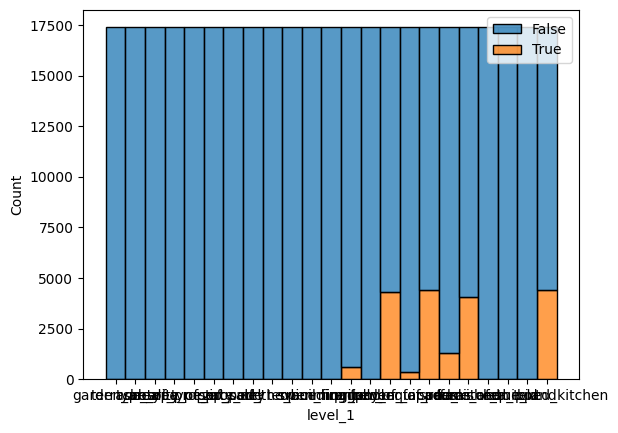

In [141]:
sns.histplot(df_withNa.isna().stack().reset_index(),x='level_1', hue=0, multiple="stack")

/tmp/ipykernel_9217/3168723548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmapp = sns.heatmap(df.corr().round(2),annot=True, center=0.4, annot_kws={"size":6})


[Text(0.5, 1.0, 'Variables_correlations')]

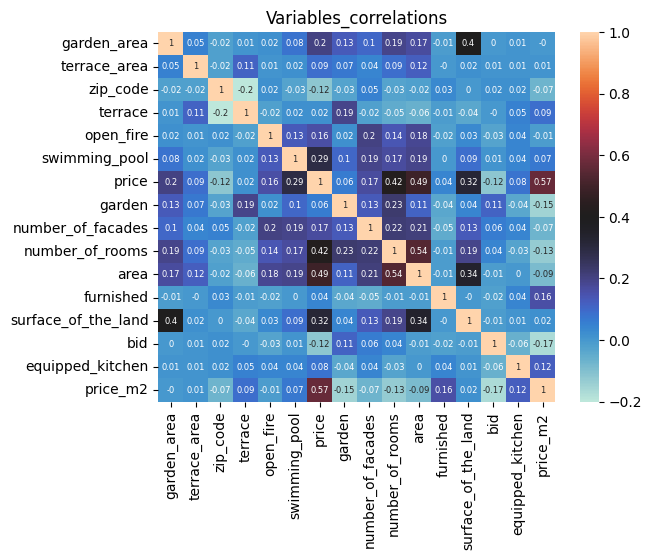

In [25]:
corr_heatmapp = sns.heatmap(df.corr().round(2),annot=True, center=0.4, annot_kws={"size":6})
corr_heatmapp.set(title='Variables_correlations' )

In [26]:
# Analyse the price per area 'localisation' (see regarding the zip_code or find municipality  dictionary and see if match immmoweb data to then plot on graph)
df['price_m2'] = (df['price']/df['area']).astype('int')

Index(['garden_area', 'terrace_area', 'locality', 'type_of_property',
       'subtype_of_property', 'type_of_sale', 'zip_code', 'url',
       'state_of_the_building', 'terrace', 'open_fire', 'swimming_pool',
       'price', 'garden', 'number_of_facades', 'number_of_rooms',
       'fully_equipped_kitchen', 'area', 'furnished', 'surface_of_the_land',
       'area_text', 'bid', 'equipped_kitchen', 'price_m2'],
      dtype='object')


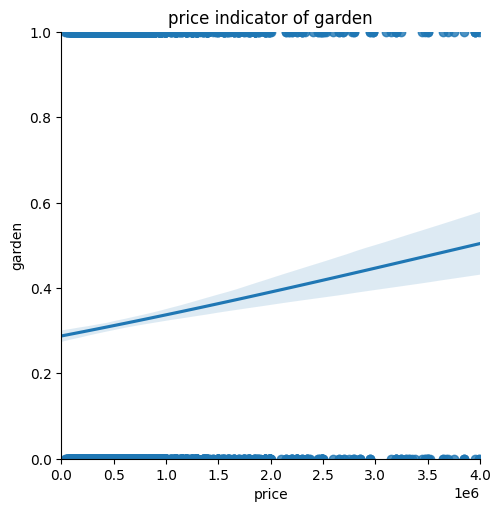

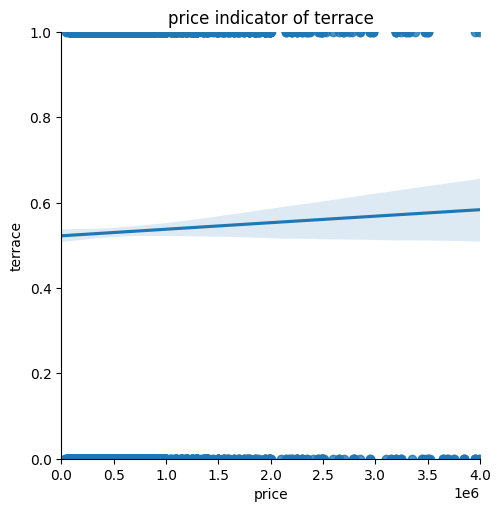

In [41]:
# make a distinction between houses en appartment

from email import header
from turtle import title


garden = sns.lmplot(x="price", y="garden", data=df,
                logistic=True, truncate=False)
                
terrace = sns.lmplot(x="price", y="terrace", data=df,
                logistic=True, truncate=False)



garden.set(ylim=(0, 1),xlim=(0, 4000000), title='price indicator of garden')
terrace.set(ylim=(0, 1), xlim=(0, 4000000),title='price indicator of terrace')


In [42]:
subtype_facades_avg_price = df[['number_of_facades', 'subtype_of_property', 'price_m2']].loc[df['type_of_property']=='house'].groupby(['subtype_of_property', 'number_of_facades']).mean().round()
subtype_facades_avg_price['number_of_facades'] = subtype_facades_avg_price['number_of_facades'].astype('int')
sns.catplot(subtype_facades_avg_price, x='subtype_of_property', y='number_of_facades',size='price_m2')

KeyError: 'number_of_facades'

In [36]:
print(df.columns)
print(df['number_of_rooms'].info())

Index(['garden_area', 'terrace_area', 'locality', 'type_of_property',
       'subtype_of_property', 'type_of_sale', 'zip_code', 'url',
       'state_of_the_building', 'terrace', 'open_fire', 'swimming_pool',
       'price', 'garden', 'number_of_facades', 'number_of_rooms',
       'fully_equipped_kitchen', 'area', 'furnished', 'surface_of_the_land',
       'area_text', 'bid', 'equipped_kitchen', 'price_m2'],
      dtype='object')
<class 'pandas.core.series.Series'>
RangeIndex: 7688 entries, 0 to 7687
Series name: number_of_rooms
Non-Null Count  Dtype
--------------  -----
7688 non-null   int64
dtypes: int64(1)
memory usage: 60.2 KB
None
